
## **Data Science:: Healthcare - Persistency of a drug**

## Step 1: Introduction

**Context:**

In this project, we are trying to understand the persistency of drug as per the physician prescription.

**Objectives:**

Gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

**Target Variable:** Persistency_Flag

**Tasks:**

1. Problem understanding
2. Data Understanding
3. Data Cleaning and Feature engineering
4. Model Development
5. Model Selection
6. Model Evaluation
7. Report the accuracy, precision and recall of both the class of target variable
8. Report ROC-AUC as well
9. Deploy the model
10. Explain the challenges and model selection

**Dataset:** Healthcare_dataset.xlsx

**Feature Description:**

- Patient ID: 	Unique ID of each patient.
- Persistency_Flag:	Flag indicating if a patient was persistent or not.
- Age:	Age of the patient during their therapy.
- Race:	Race of the patient from the patient table.
- Region:	Region of the patient from the patient table.
- Ethnicity:	Ethnicity of the patient from the patient table.
- Gender:	Gender of the patient from the patient table.
- IDN Indicator:	Flag indicating patients mapped to IDN.
- NTM - Physician Specialty:	Specialty of the HCP that prescribed the NTM Rx.
- NTM - T-Score: T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)
- Change in T Score: 	Change in Tscore before starting with any therapy and after receiving therapy  (Worsened, Remained Same, Improved, Unknown)
- NTM - Risk Segment:	Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate).
- Change in Risk Segment:	Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown).
- NTM - Multiple Risk Factors:	Flag indicating if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate).
- NTM - Dexa Scan: Frequency	Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate).
- NTM - Dexa Scan Recency:	Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable).
- Dexa During Therapy:	Flag indicating if the patient had a Dexa Scan during their first continuous therapy.
- NTM - Fragility Fracture Recency:	Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate).
- Fragility Fracture During Therapy:	Flag indicating if the patient had fragility fracture  during their first continuous therapy.
- NTM - Glucocorticoid Recency:	Flag indicating usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx.
- Glucocorticoid Usage During Therapy:	Flag indicating if the patient had a Glucocorticoid usage during the first continuous therapy.
- NTM - Injectable Experience:	Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx.
- NTM - Risk Factors:	Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx.
- NTM - Comorbidity: 	Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied.
- NTM - Concomitancy:	Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate).
- Adherence:	Adherence for the therapies

## Step 2: Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step 3: Loading the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/My Drive/Healthcare_dataset.xlsx', sheet_name='Dataset')

In [4]:
# Mkaing a copy of tha dataset:
df = data.copy()

In [170]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,Comorb_Encounter_For_Immunization.1,Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,z_score_Count_Of_Risks,scaled_Count_Of_Risks,bin,target,Persistency_Numeric
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB GYN Others PCP Unknown,N,N,0,N,N,N,VLR LR,,VLR LR,,No change,No change,Adherent,N,Y,N,y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,-1.132204,-1.132204,"(-inf, 0.0]",1,1
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB GYN Others PCP Unknown,N,N,0,N,N,N,VLR LR,,HR VHR,,No change,No change,Adherent,N,Y,N,n,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,-1.132204,-1.132204,"(-inf, 0.0]",0,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB GYN Others PCP Unknown,N,N,0,N,N,N,HR VHR,,HR VHR,,No change,No change,Adherent,N,Y,Y,n,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2,0.694689,0.694689,"(1.0, inf]",0,0
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB GYN Others PCP Unknown,N,Y,0,N,N,N,HR VHR,,HR VHR,,No change,No change,Adherent,N,Y,N,y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,-0.218758,-0.218758,"(0.0, 1.0]",0,0
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB GYN Others PCP Unknown,Y,Y,0,N,N,N,HR VHR,,HR VHR,,No change,No change,Adherent,N,Y,Y,y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,-0.218758,-0.218758,"(0.0, 1.0]",0,0


In [171]:
# Let's display all the columns :
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(df)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,Comorb_Encounter_For_Immunization.1,Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,z_score_Count_Of_Risks,scaled_Count_Of_Risks,bin,target,Persistency_Numeric
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB GYN Others PCP Unknown,N,N,0,N,N,N,VLR LR,,VLR LR,,No change,No change,Adherent,N,Y,N,y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,-1.132204,-1.132204,"(-inf, 0.0]",1,1
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB GYN Others PCP Unknown,N,N,0,N,N,N,VLR LR,,HR VHR,,No change,No change,Adherent,N,Y,N,n,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,-1.132204,-1.132204,"(-inf, 0.0]",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB GYN Others PCP Unknown,N,N,0,N,N,Y,VLR LR,,HR VHR,,No change,No change,Adherent,Y,Y,Y,n,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,-1.132204,-1.132204,"(-inf, 0.0]",0,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB GYN Others PCP Unknown,Y,Y,0,N,N,N,VLR LR,,HR VHR,,No change,No change,Adherent,Y,Y,N,n,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,1,-0.218758,-0.218758,"(0.0, 1.0]",0,0


In [7]:
df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encounter_For_Immunization.1', 'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Disea

## Step 4: Data Exploration


### A) Basic Data Exploration

In [8]:
df.shape

(3424, 69)

In [9]:
df.size

236256

In [10]:
df.ndim

2

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [12]:
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [172]:
# get some info & statistics about the Numerical data:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dexa_Freq_During_Rx,3424.0,3.016063e+00,8.136545,0.000000,0.000000,0.000000,3.000000,146.000000
Count_Of_Risks,3424.0,1.239486e+00,1.094914,0.000000,0.000000,1.000000,2.000000,7.000000
z_score_Count_Of_Risks,3424.0,1.203606e-16,1.000146,-1.132204,-1.132204,-0.218758,0.694689,5.261923
scaled_Count_Of_Risks,3424.0,1.203606e-16,1.000146,-1.132204,-1.132204,-0.218758,0.694689,5.261923
target,3424.0,3.764603e-01,0.484568,0.000000,0.000000,0.000000,1.000000,1.000000
Persistency_Numeric,3424.0,3.764603e-01,0.484568,0.000000,0.000000,0.000000,1.000000,1.000000


In [173]:
# get some info & statistics about the Categorical data:
df.describe(include=['object']).T
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.describe(include=['object']).T)

,count,unique,top,freq
Ptid,3424,3424,P1,1
Persistency_Flag,3424,2,Non-Persistent,2135
Gender,3424,2,Female,3230
Race,3424,4,Caucasian,3148
Ethnicity,3424,2,Not Hispanic,3326
Region,3424,5,Midwest,1383
Age_Bucket,3424,4,>75,1439
Ntm_Speciality,3424,35,GENERAL PRACTITIONER,1845
Ntm_Specialist_Flag,3424,2,Others,2013
Ntm_Speciality_Bucket,3424,3,OB GYN Others PCP Unknown,2104


In [15]:
# searching for any Missing Values:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [16]:
# searching for any duplicated rows:
df[df.duplicated()]

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks


In [17]:
# getting the unique values of all columns:
for i in df.columns:
  print(f'Unique Values in {i} are ')
  print(df[i].unique())
  print('#'*50)

Unique Values in Ptid are 
['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
##################################################
Unique Values in Persistency_Flag are 
['Persistent' 'Non-Persistent']
##################################################
Unique Values in Gender are 
['Male' 'Female']
##################################################
Unique Values in Race are 
['Caucasian' 'Asian' 'Other/Unknown' 'African American']
##################################################
Unique Values in Ethnicity are 
['Not Hispanic' 'Hispanic' 'Unknown']
##################################################
Unique Values in Region are 
['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
##################################################
Unique Values in Age_Bucket are 
['>75' '55-65' '65-75' '<55']
##################################################
Unique Values in Ntm_Speciality are 
['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY

### B) Addressing Skewness

In [18]:
# Identify numerical columns in your dataset
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Apply a transformation to reduce skewness, for example, log transformation
# Ensure to add 1 to avoid log(0) which is undefined
for col in numerical_cols:
    if data[col].skew() > 1:
        data[col] = np.log1p(data[col])



In [19]:
# Apply a transformation to reduce skewness, for example, log transformation
# Ensure to add 1 to avoid log(0) which is undefined
for col in numerical_cols:
    if data[col].skew() > 1:
        data[col] = np.log1p(data[col])


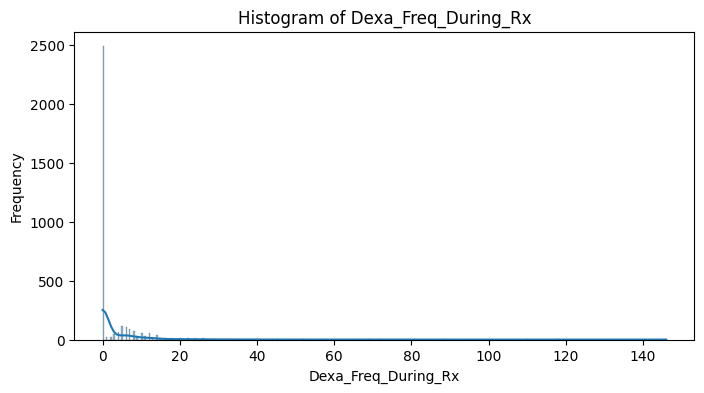

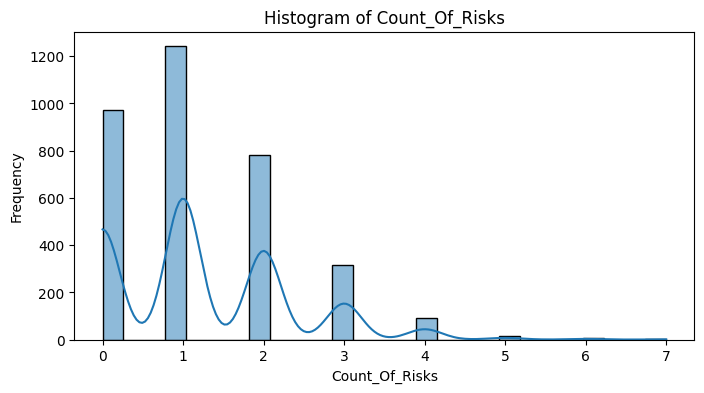

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['Dexa_Freq_During_Rx', 'Count_Of_Risks']

# Plotting histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


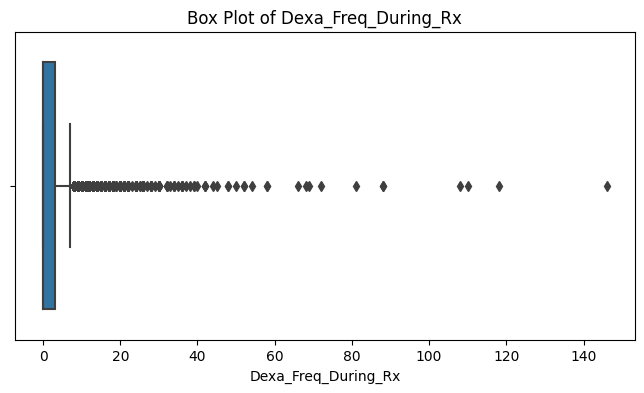

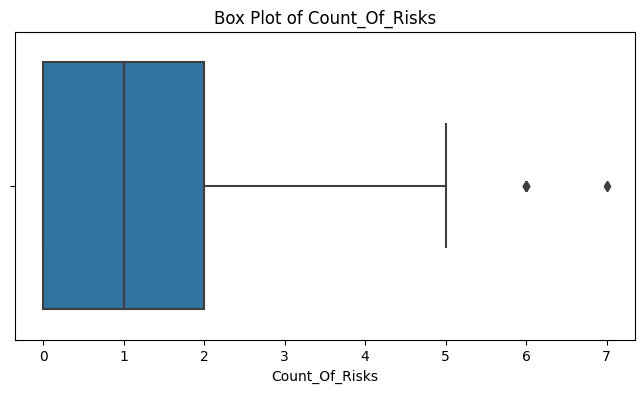

In [21]:
# Plotting box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


## Step 5:  Data Cleansing and Transformation

### A) Handling Missing Values

In [22]:
# Checking for Implicit Missing Values
# Replace placeholders like 'Unknown', 'NA', 'N/A', etc., with np.nan
implicit_na_values = ['Unknown', 'NA', 'N/A']
df.replace(implicit_na_values, np.nan, inplace=True)

# Display the first few rows of the DataFrame to confirm the changes
print(df.head())




  Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0  OB/GYN/Others/PCP/Unknown  ...                                   N   
1  OB/GYN/Others/PCP/Unknown  ...                                 

In [23]:
import pandas as pd

import pandas as pd

# Set option to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Now run the isna().sum() again to see the missing values in all columns
missing_values_count = df.isna().sum()
print(missing_values_count)

Ptid                                                                     0
Persistency_Flag                                                         0
Gender                                                                   0
Race                                                                     0
Ethnicity                                                               91
Region                                                                   0
Age_Bucket                                                               0
Ntm_Speciality                                                         310
Ntm_Specialist_Flag                                                      0
Ntm_Speciality_Bucket                                                    0
Gluco_Record_Prior_Ntm                                                   0
Gluco_Record_During_Rx                                                   0
Dexa_Freq_During_Rx                                                      0
Dexa_During_Rx           

In [24]:
# Mean Imputation for Numerical Columns
# Identify all numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Applying mean imputation to each numerical column
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Display the first few rows after mean imputation for each numerical column
print("First 5 rows after Mean Imputation for Numerical Columns:")
for column in numerical_columns:
    print(f"\nColumn: {column}")
    print(df[column].head())


First 5 rows after Mean Imputation for Numerical Columns:

Column: Dexa_Freq_During_Rx
0    0
1    0
2    0
3    0
4    0
Name: Dexa_Freq_During_Rx, dtype: int64

Column: Count_Of_Risks
0    0
1    0
2    2
3    1
4    1
Name: Count_Of_Risks, dtype: int64


In [25]:
# Median Imputation for Numerical Columns
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Display the first few rows after median imputation for each numerical column
print("First 5 rows after Median Imputation for Numerical Columns:")
for column in numerical_columns:
    print(f"\nColumn: {column}")
    print(df[column].head())


First 5 rows after Median Imputation for Numerical Columns:

Column: Dexa_Freq_During_Rx
0    0
1    0
2    0
3    0
4    0
Name: Dexa_Freq_During_Rx, dtype: int64

Column: Count_Of_Risks
0    0
1    0
2    2
3    1
4    1
Name: Count_Of_Risks, dtype: int64


In [26]:
# Mode Imputation for Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Display the first few rows after mode imputation for each categorical column
print("First 5 rows after Mode Imputation for Categorical Columns:")
for column in categorical_columns:
    print(f"\nColumn: {column}")
    print(df[column].head())


First 5 rows after Mode Imputation for Categorical Columns:

Column: Ptid
0    P1
1    P2
2    P3
3    P4
4    P5
Name: Ptid, dtype: object

Column: Persistency_Flag
0        Persistent
1    Non-Persistent
2    Non-Persistent
3    Non-Persistent
4    Non-Persistent
Name: Persistency_Flag, dtype: object

Column: Gender
0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

Column: Race
0        Caucasian
1            Asian
2    Other/Unknown
3        Caucasian
4        Caucasian
Name: Race, dtype: object

Column: Ethnicity
0    Not Hispanic
1    Not Hispanic
2        Hispanic
3    Not Hispanic
4    Not Hispanic
Name: Ethnicity, dtype: object

Column: Region
0       West
1       West
2    Midwest
3    Midwest
4    Midwest
Name: Region, dtype: object

Column: Age_Bucket
0      >75
1    55-65
2    65-75
3      >75
4      >75
Name: Age_Bucket, dtype: object

Column: Ntm_Speciality
0    GENERAL PRACTITIONER
1    GENERAL PRACTITIONER
2    GENERAL PRACTITIONER

In [27]:
#KNN Imputation for Mixed Columns
from sklearn.impute import KNNImputer
import numpy as np

# KNN Imputation for Mixed Columns
columns_to_impute = numerical_columns.tolist() + categorical_columns.tolist()
df_knn = df[columns_to_impute].copy()

# Convert categorical variables to numeric for KNN imputation
for column in categorical_columns:
    df_knn[column] = df_knn[column].astype('category').cat.codes

knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

# Display first few rows after KNN Imputation
print("First 5 rows after KNN Imputation:")
print(df_knn_imputed.head())


First 5 rows after KNN Imputation:
   Dexa_Freq_During_Rx  Count_Of_Risks    Ptid  Persistency_Flag  Gender  \
0                  0.0             0.0     0.0               1.0     1.0   
1                  0.0             0.0  1111.0               0.0     1.0   
2                  0.0             2.0  2222.0               0.0     0.0   
3                  0.0             1.0  2758.0               0.0     0.0   
4                  0.0             1.0  2869.0               0.0     0.0   

   Race  Ethnicity  Region  Age_Bucket  Ntm_Speciality  Ntm_Specialist_Flag  \
0   2.0        1.0     4.0         3.0             5.0                  0.0   
1   1.0        1.0     4.0         0.0             5.0                  0.0   
2   3.0        0.0     0.0         1.0             5.0                  0.0   
3   2.0        1.0     0.0         3.0             5.0                  0.0   
4   2.0        1.0     0.0         3.0             5.0                  0.0   

   Ntm_Speciality_Bucket  Gluco_R

### B) Handling Outliers

In [28]:
# Identifying numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Displaying skewness for numerical columns
print("Skewness for Numerical Columns:")
print(df[numerical_columns].skew())

# Based on skewness and domain knowledge, select columns for IQR method
# Here's an example of selecting a column with high skewness
selected_columns = ['Column_Name_With_High_Skewness']  # Replace with actual column names based on skewness and domain knowledge

# Displaying selected columns
print("\nSelected Columns for IQR Method:")
print(selected_columns)


Skewness for Numerical Columns:
Dexa_Freq_During_Rx    6.808730
Count_Of_Risks         0.879791
dtype: float64

Selected Columns for IQR Method:
['Column_Name_With_High_Skewness']


In [29]:
# IQR method for 'Dexa_Freq_During_Rx'
Q1_dexa = df['Dexa_Freq_During_Rx'].quantile(0.25)
Q3_dexa = df['Dexa_Freq_During_Rx'].quantile(0.75)
IQR_dexa = Q3_dexa - Q1_dexa
lower_bound_dexa = Q1_dexa - 1.5 * IQR_dexa
upper_bound_dexa = Q3_dexa + 1.5 * IQR_dexa

df_filtered_dexa = df[(df['Dexa_Freq_During_Rx'] >= lower_bound_dexa) & (df['Dexa_Freq_During_Rx'] <= upper_bound_dexa)]

# Displaying some data to show the effect of outlier removal on 'Dexa_Freq_During_Rx'
print("\nData in 'Dexa_Freq_During_Rx' after applying IQR method:")
print(df_filtered_dexa['Dexa_Freq_During_Rx'].head())




Data in 'Dexa_Freq_During_Rx' after applying IQR method:
0    0
1    0
2    0
3    0
4    0
Name: Dexa_Freq_During_Rx, dtype: int64


In [30]:
# Z-score method for 'Count_Of_Risks'
from scipy import stats

z_scores = stats.zscore(df['Count_Of_Risks'])
df['z_score_Count_Of_Risks'] = z_scores

# Filtering out the outliers
df_no_outliers = df[(z_scores >= -3) & (z_scores <= 3)]

# Displaying the results
print("Data after removing outliers using Z-score for 'Count_Of_Risks':")
print(df_no_outliers[['Count_Of_Risks', 'z_score_Count_Of_Risks']].head())



Data after removing outliers using Z-score for 'Count_Of_Risks':
   Count_Of_Risks  z_score_Count_Of_Risks
0               0               -1.132204
1               0               -1.132204
2               2                0.694689
3               1               -0.218758
4               1               -0.218758


In [31]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Race', 'Ethnicity'], drop_first=True)

# Displaying the results
print("Data after One-Hot Encoding for 'Race' and 'Ethnicity':")
print(df_encoded.head())


Data after One-Hot Encoding for 'Race' and 'Ethnicity':
  Ptid Persistency_Flag  Gender   Region Age_Bucket        Ntm_Speciality  \
0   P1       Persistent    Male     West        >75  GENERAL PRACTITIONER   
1   P2   Non-Persistent    Male     West      55-65  GENERAL PRACTITIONER   
2   P3   Non-Persistent  Female  Midwest      65-75  GENERAL PRACTITIONER   
3   P4   Non-Persistent  Female  Midwest        >75  GENERAL PRACTITIONER   
4   P5   Non-Persistent  Female  Midwest        >75  GENERAL PRACTITIONER   

  Ntm_Specialist_Flag      Ntm_Speciality_Bucket Gluco_Record_Prior_Ntm  \
0              Others  OB/GYN/Others/PCP/Unknown                      N   
1              Others  OB/GYN/Others/PCP/Unknown                      N   
2              Others  OB/GYN/Others/PCP/Unknown                      N   
3              Others  OB/GYN/Others/PCP/Unknown                      N   
4              Others  OB/GYN/Others/PCP/Unknown                      Y   

  Gluco_Record_During_Rx  Dexa

In [32]:
#Scaling Numerical Variables
from sklearn.preprocessing import StandardScaler

# StandardScaler for numerical columns
scaler = StandardScaler()
df['scaled_Count_Of_Risks'] = scaler.fit_transform(df[['Count_Of_Risks']])

# Displaying the results
print("Data after scaling 'Count_Of_Risks':")
print(df[['Count_Of_Risks', 'scaled_Count_Of_Risks']].head())



Data after scaling 'Count_Of_Risks':
   Count_Of_Risks  scaled_Count_Of_Risks
0               0              -1.132204
1               0              -1.132204
2               2               0.694689
3               1              -0.218758
4               1              -0.218758


In [33]:
#Weight of Evidence (WoE) calculation
# Manual Binning for 'Count_Of_Risks'
df['bin'] = pd.cut(df['Count_Of_Risks'], bins=[-np.inf, 0, 1, np.inf])  # Adjust the bins based on the data distribution

# Continue with WoE calculation
df['target'] = df['Persistency_Flag'].map({'Persistent': 1, 'Non-Persistent': 0})
woe_df = df.groupby('bin')['target'].agg(['count', 'sum'])
woe_df.columns = ['total', 'bad']
woe_df['good'] = woe_df['total'] - woe_df['bad']
woe_df['woe'] = np.log((woe_df['good'] / woe_df['bad']) / (sum(woe_df['good']) / sum(woe_df['bad'])))

# Displaying WoE results
print("WoE results:")
print(woe_df[['woe']])



WoE results:
                  woe
bin                  
(-inf, 0.0]  0.241602
(0.0, 1.0]  -0.011770
(1.0, inf]  -0.171521


### C) NLP Featurization and Data Cleaning

In [34]:
#Regex Cleaning
import re

# Define a function to clean columns using regex
def clean_column_with_regex(column_data, column_name):
    # Define the regex pattern to remove non-alphabetical characters
    pattern = '[^A-Za-z]+'
    # Apply regex cleaning to the column
    cleaned_data = column_data.apply(lambda x: re.sub(pattern, ' ', str(x)))
    df[column_name] = cleaned_data

# Columns to clean
columns_to_clean = [
    'Ntm_Speciality',
    'Ntm_Speciality_Bucket',
    'Risk_Segment_Prior_Ntm',
    'Risk_Segment_During_Rx',
    'Tscore_Bucket_Prior_Ntm',
    'Tscore_Bucket_During_Rx',
    'Change_T_Score',
    'Change_Risk_Segment'
]

# Clean the specified columns
for column_name in columns_to_clean:
    if column_name in df.columns:
        clean_column_with_regex(df[column_name], column_name)
        print(f"Cleaning column '{column_name}'...")

# Display the first 5 rows of cleaned columns
for column_name in columns_to_clean:
    if column_name in df.columns:
        print(f"First 5 rows of '{column_name}' after cleaning:")
        print(df[column_name].head())




Cleaning column 'Ntm_Speciality'...
Cleaning column 'Ntm_Speciality_Bucket'...
Cleaning column 'Risk_Segment_Prior_Ntm'...
Cleaning column 'Risk_Segment_During_Rx'...
Cleaning column 'Tscore_Bucket_Prior_Ntm'...
Cleaning column 'Tscore_Bucket_During_Rx'...
Cleaning column 'Change_T_Score'...
Cleaning column 'Change_Risk_Segment'...
First 5 rows of 'Ntm_Speciality' after cleaning:
0    GENERAL PRACTITIONER
1    GENERAL PRACTITIONER
2    GENERAL PRACTITIONER
3    GENERAL PRACTITIONER
4    GENERAL PRACTITIONER
Name: Ntm_Speciality, dtype: object
First 5 rows of 'Ntm_Speciality_Bucket' after cleaning:
0    OB GYN Others PCP Unknown
1    OB GYN Others PCP Unknown
2    OB GYN Others PCP Unknown
3    OB GYN Others PCP Unknown
4    OB GYN Others PCP Unknown
Name: Ntm_Speciality_Bucket, dtype: object
First 5 rows of 'Risk_Segment_Prior_Ntm' after cleaning:
0    VLR LR
1    VLR LR
2    HR VHR
3    HR VHR
4    HR VHR
Name: Risk_Segment_Prior_Ntm, dtype: object
First 5 rows of 'Risk_Segment_During

In [35]:
# Lowercasing the text data
df['Comorb_Encounter_For_Immunization'] = df['Comorb_Encounter_For_Immunization'].str.lower()


In [39]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensuring all text data is in string format
df['Ntm_Speciality'] = df['Ntm_Speciality'].fillna('').astype(str)

# Apply TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Ntm_Speciality'])

# Convert the resulting matrix to a DataFrame using get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Display the first 5 rows of cleaned columns
for column_name in columns_to_clean:
    if column_name in df.columns:
        print(f"First 5 rows of '{column_name}' after cleaning:")
        print(df[column_name].head())

# Display the first 5 rows of the TF-IDF DataFrame
print("First 5 rows of TF-IDF matrix:")
print(tfidf_df.head())


First 5 rows of 'Ntm_Speciality' after cleaning:
0    GENERAL PRACTITIONER
1    GENERAL PRACTITIONER
2    GENERAL PRACTITIONER
3    GENERAL PRACTITIONER
4    GENERAL PRACTITIONER
Name: Ntm_Speciality, dtype: object
First 5 rows of 'Ntm_Speciality_Bucket' after cleaning:
0    OB GYN Others PCP Unknown
1    OB GYN Others PCP Unknown
2    OB GYN Others PCP Unknown
3    OB GYN Others PCP Unknown
4    OB GYN Others PCP Unknown
Name: Ntm_Speciality_Bucket, dtype: object
First 5 rows of 'Risk_Segment_Prior_Ntm' after cleaning:
0    VLR LR
1    VLR LR
2    HR VHR
3    HR VHR
4    HR VHR
Name: Risk_Segment_Prior_Ntm, dtype: object
First 5 rows of 'Risk_Segment_During_Rx' after cleaning:
0    VLR LR
1    HR VHR
2    HR VHR
3    HR VHR
4    HR VHR
Name: Risk_Segment_During_Rx, dtype: object
First 5 rows of 'Tscore_Bucket_Prior_Ntm' after cleaning:
0     
1     
2     
3     
4     
Name: Tscore_Bucket_Prior_Ntm, dtype: object
First 5 rows of 'Tscore_Bucket_During_Rx' after cleaning:
0     
1     

## Step 6: EDA

### A) Persistency Flag Distribution

**Explore the distribution of the persistency flag and how does drug persistency vary across different genders?**

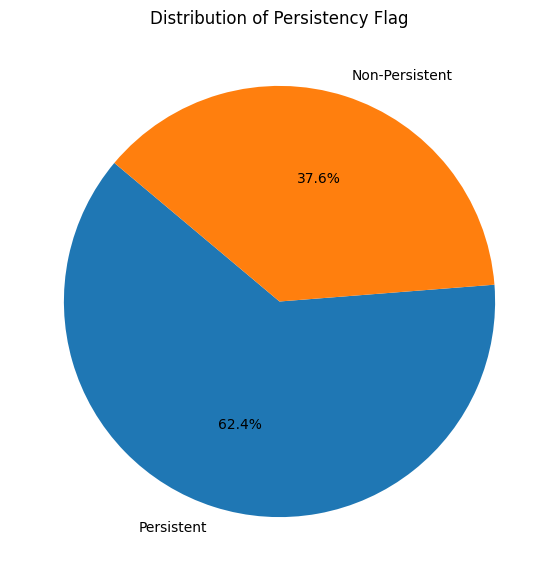

In [89]:
# Visualization: Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(df['Persistency_Flag'].value_counts(), labels=df['Persistency_Flag'].unique(), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Persistency Flag")
plt.show()



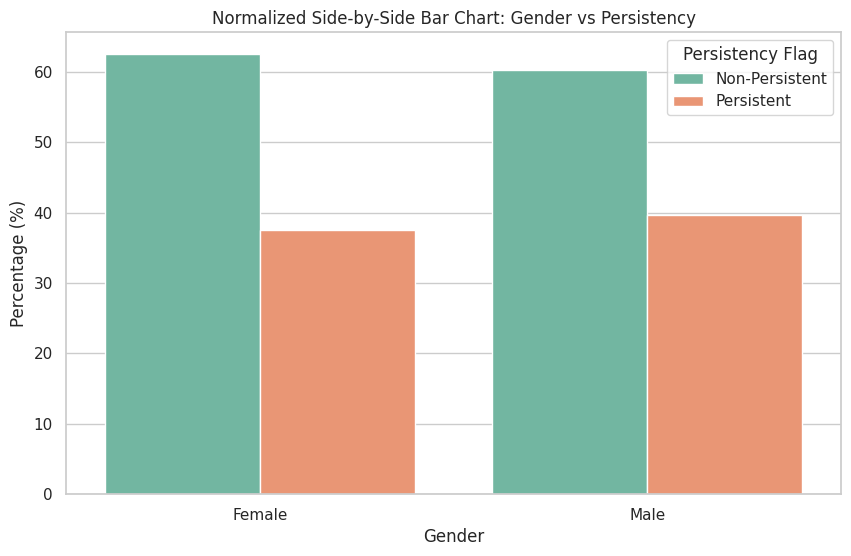

In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate the proportions
proportion_data = (df.groupby('Gender')['Persistency_Flag']
                    .value_counts(normalize=True)
                    .rename('percentage')
                    .mul(100)
                    .reset_index())

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='percentage', hue='Persistency_Flag', data=proportion_data, palette='Set2')
plt.title("Normalized Side-by-Side Bar Chart: Gender vs Persistency")
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.legend(title='Persistency Flag')
plt.show()


### B) Ethnicity and Its Impact on Drug Persistency

**Does ethnicity impact the persistency of drug usage?**

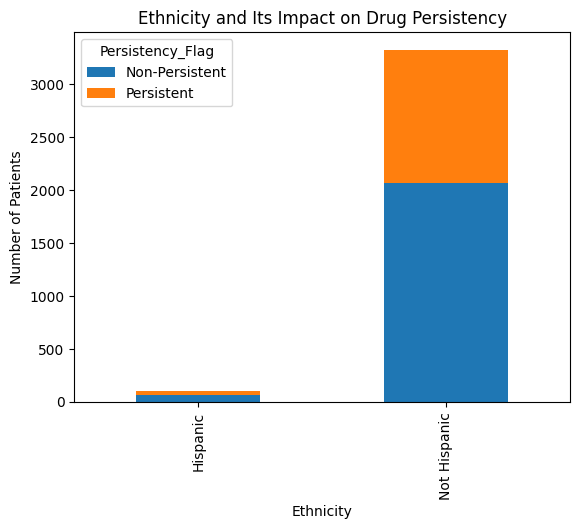

In [77]:
# Visualization: Stacked Bar Chart
pd.crosstab(df['Ethnicity'], df['Persistency_Flag']).plot(kind='bar', stacked=True)
plt.title("Ethnicity and Its Impact on Drug Persistency")
plt.ylabel('Number of Patients')
plt.show()


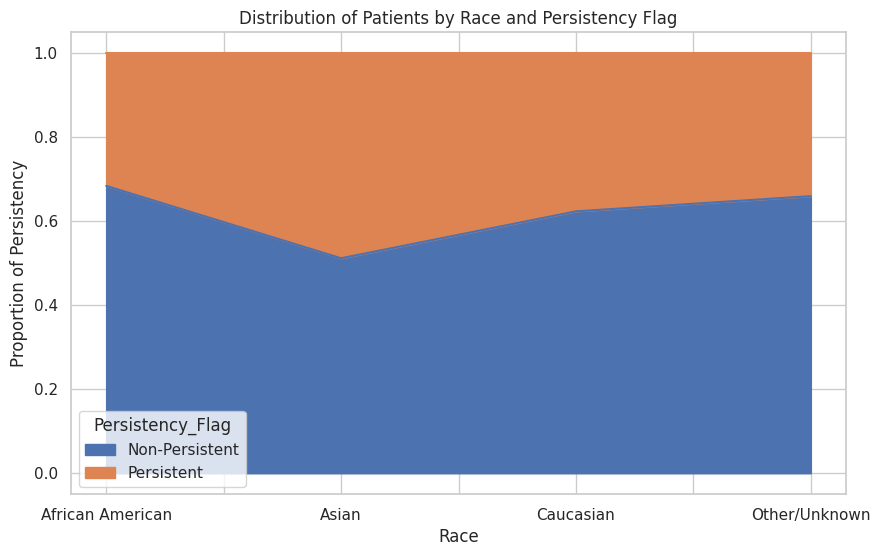

In [187]:
race_persistency_data = pd.crosstab(index=df['Race'], columns=df['Persistency_Flag'])
race_persistency_data.divide(race_persistency_data.sum(axis=1), axis=0).plot(kind='area', stacked=True, figsize=(10, 6))
plt.title("Distribution of Patients by Race and Persistency Flag")
plt.xlabel("Race")
plt.ylabel("Proportion of Persistency")
plt.show()


### C) Age Distribution of Patients

**What is the age distribution of patients in different persistency groups?**

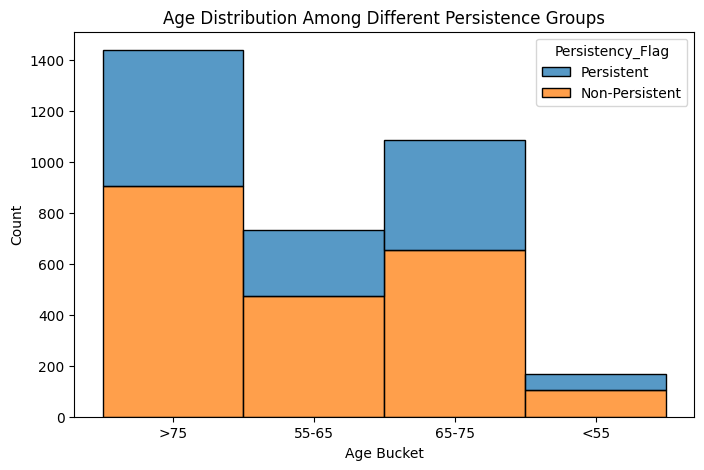

In [93]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age_Bucket', hue='Persistency_Flag', multiple="stack")
plt.title("Age Distribution Among Different Persistence Groups")
plt.xlabel("Age Bucket")
plt.ylabel("Count")
plt.show()



### D) Specialty of Healthcare Providers Prescribing the Drug

**What are the common specialties of healthcare providers prescribing this drug and what are the specialties of physicians prescribing NTM?**

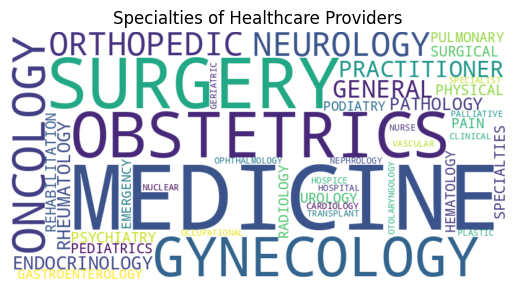

In [82]:
# Visualization: Word Cloud
from wordcloud import WordCloud
text = ' '.join(df['Ntm_Speciality'].dropna().unique().tolist())
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Specialties of Healthcare Providers")
plt.axis('off')
plt.show()


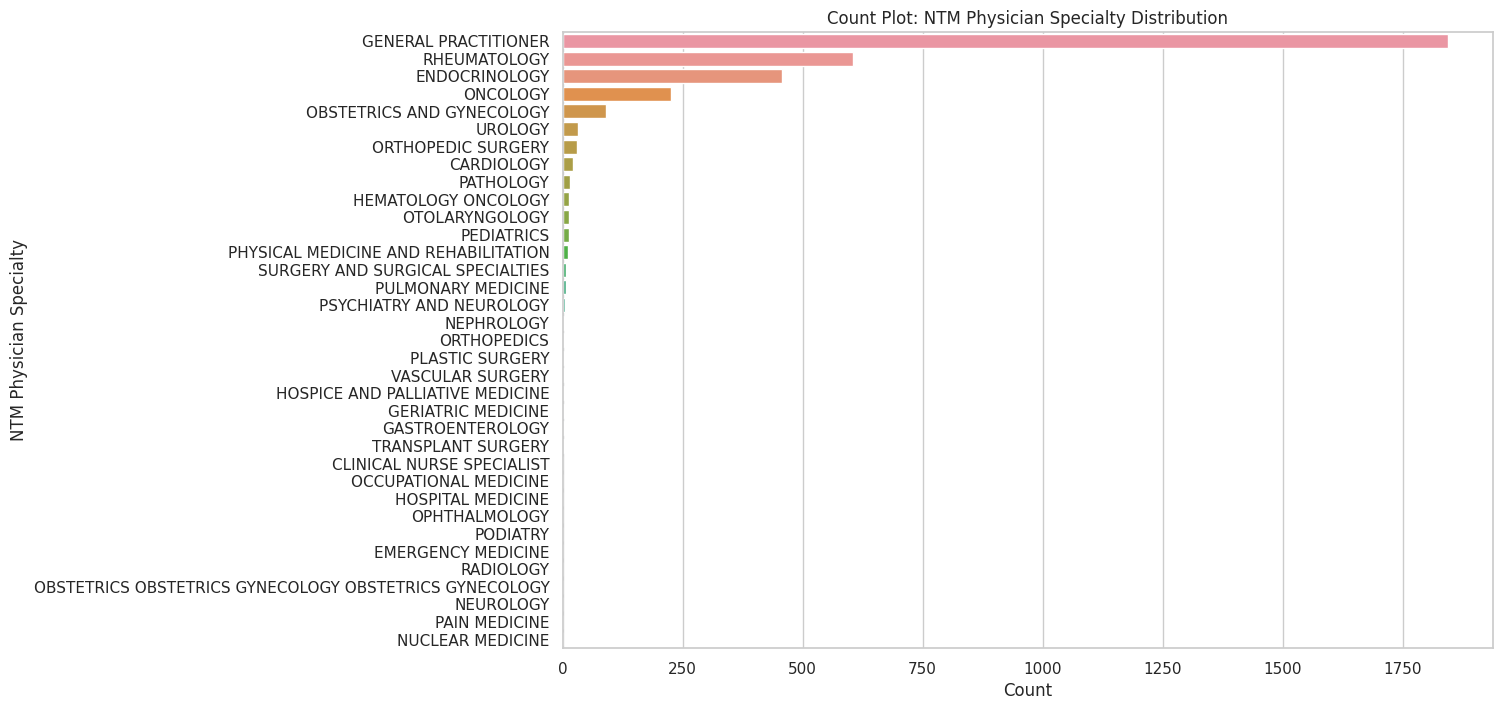

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization Code
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.countplot(y='Ntm_Speciality', data=df, order=df['Ntm_Speciality'].value_counts().index)
plt.title("Count Plot: NTM Physician Specialty Distribution")
plt.xlabel("Count")
plt.ylabel("NTM Physician Specialty")
plt.show()



### E) Dexa Scan Analysis

**How often do patients undergo DEXA scans and How does the frequency of Dexa scans influence age and drug persistency??**

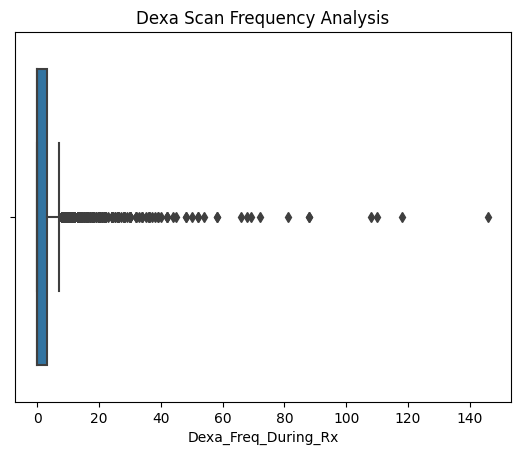

In [91]:
# Visualization: Box Plot
sns.boxplot(x='Dexa_Freq_During_Rx', data=df)
plt.title("Dexa Scan Frequency Analysis")
plt.show()




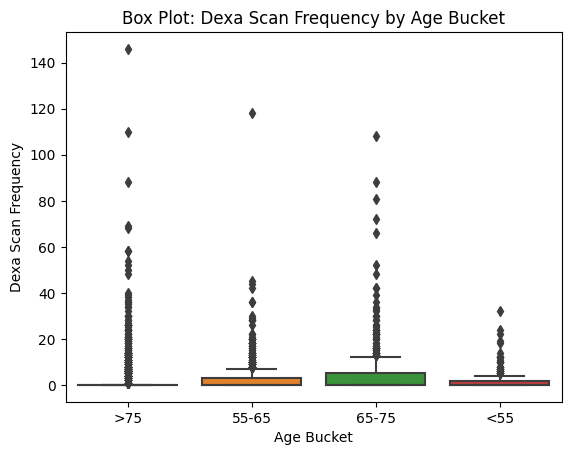

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization Code
sns.boxplot(x='Age_Bucket', y='Dexa_Freq_During_Rx', data=df)
plt.title("Box Plot: Dexa Scan Frequency by Age Bucket")
plt.xlabel("Age Bucket")
plt.ylabel("Dexa Scan Frequency")
plt.show()


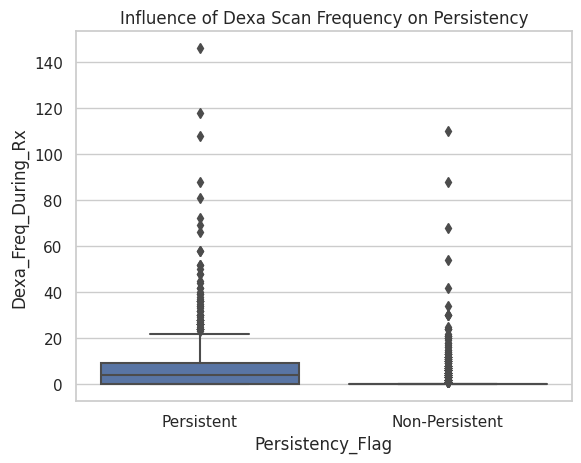

In [149]:
sns.boxplot(x='Persistency_Flag', y='Dexa_Freq_During_Rx', data=df)
plt.title("Influence of Dexa Scan Frequency on Persistency")
plt.show()

**Distribution of Dexa Frequency During Rx for Different Risk Segments Using a Boxen Plot**

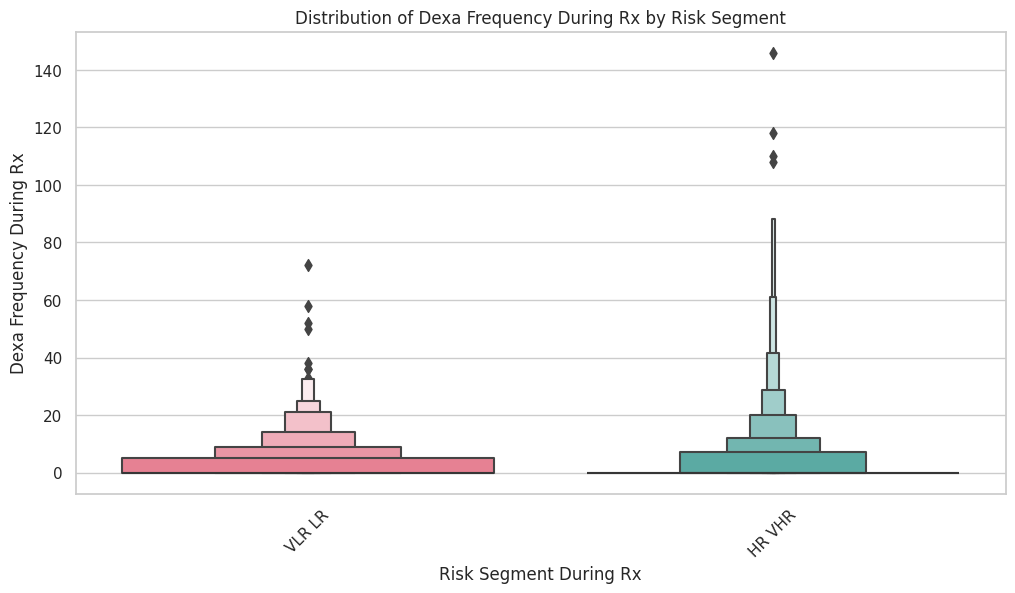

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxen plot to visualize the distribution of Dexa Frequency During Rx for different Risk Segments
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x='Risk_Segment_During_Rx', y='Dexa_Freq_During_Rx', palette='husl')
plt.xlabel("Risk Segment During Rx")
plt.ylabel("Dexa Frequency During Rx")
plt.title("Distribution of Dexa Frequency During Rx by Risk Segment")
plt.xticks(rotation=45)
plt.show()


### F) Relationship Between Risk Factors and Drug Persistency

**Is there a correlation between the number of risk factors and drug persistency?**

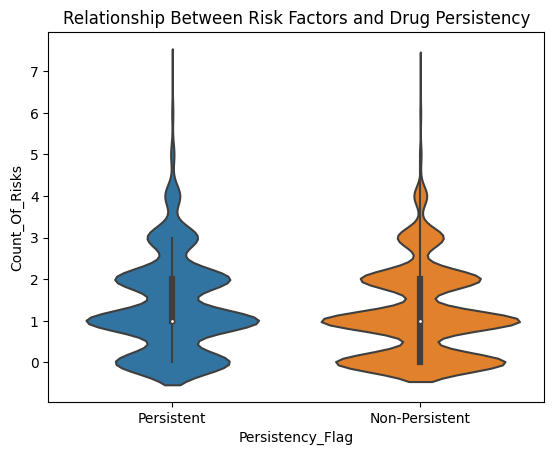

In [84]:
# Visualization: Violin Plot
sns.violinplot(x='Persistency_Flag', y='Count_Of_Risks', data=df)
plt.title("Relationship Between Risk Factors and Drug Persistency")
plt.show()


### G) Regional Distribution of Patients

**What is the distribution of patients across different regions?**

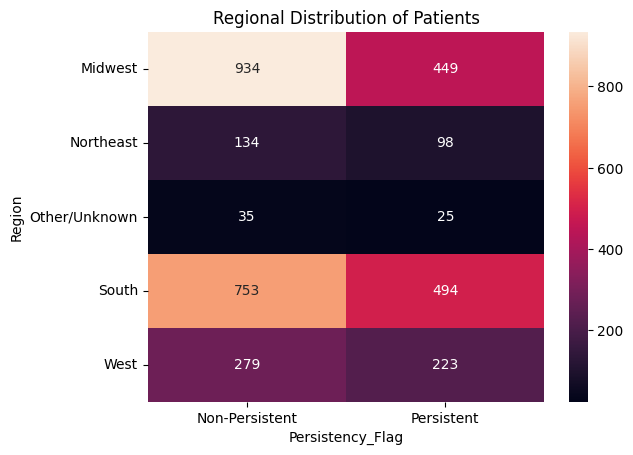

In [85]:
# Visualization: Heat Map (using a pivot table)
region_pivot = df.pivot_table(index='Region', columns='Persistency_Flag', values='Ptid', aggfunc='count')
sns.heatmap(region_pivot, annot=True, fmt="d")
plt.title("Regional Distribution of Patients")
plt.show()


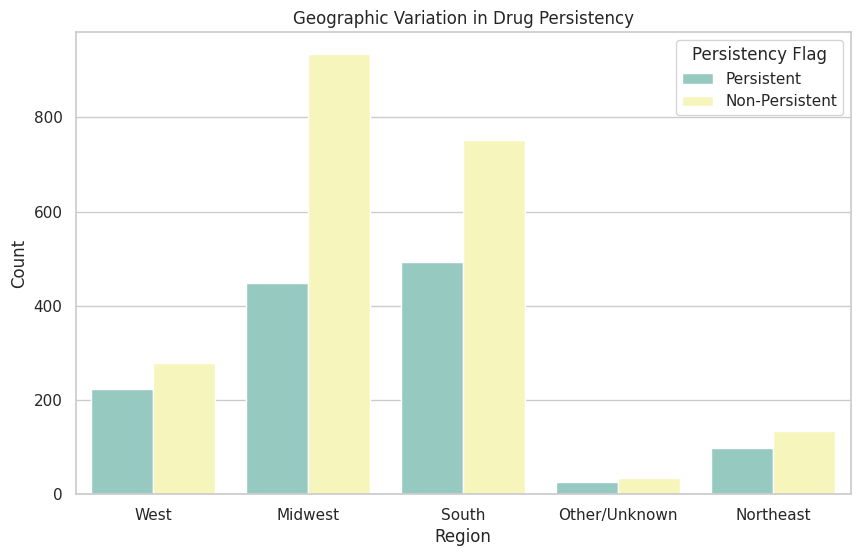

In [183]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Persistency_Flag', data=df, palette='Set3')
plt.title("Geographic Variation in Drug Persistency")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title='Persistency Flag')
plt.show()


### H) Heatmap for Adherence to Therapy and Persistency

**How does the frequency of patients' adherence to therapy correlate with their drug persistency?**

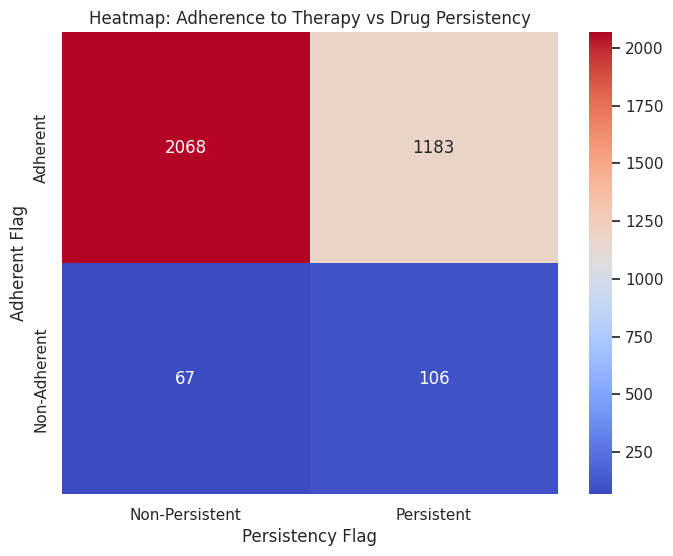

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preparing data for the heatmap
adherence_persistency_matrix = pd.crosstab(index=df['Adherent_Flag'], columns=df['Persistency_Flag'])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(adherence_persistency_matrix, annot=True, fmt="d", cmap='coolwarm')
plt.title("Heatmap: Adherence to Therapy vs Drug Persistency")
plt.xlabel("Persistency Flag")
plt.ylabel("Adherent Flag")
plt.show()





### I) Impact of Comorbid Conditions on Drug Persistency

**What is the impact of different comorbid conditions on drug persistency?**

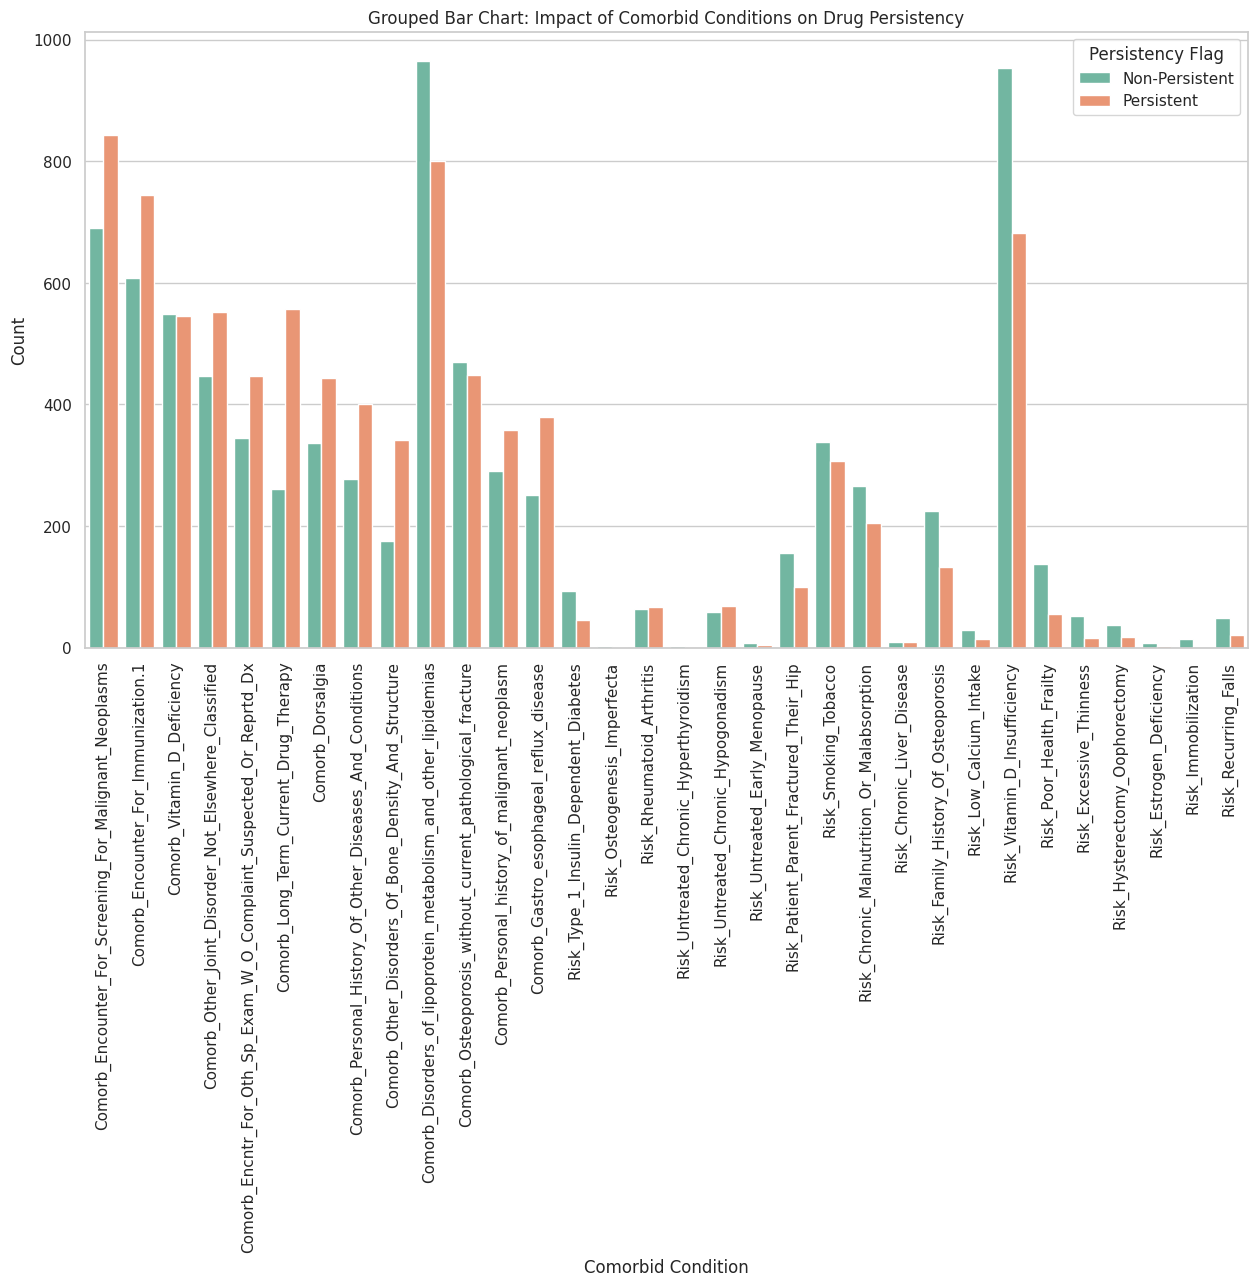

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preparing the data for grouped bar chart
# Selecting comorbid condition columns
comorbid_columns = [col for col in df.columns if 'Comorb' in col or 'Risk' in col]

# Melting the DataFrame for easier plotting
melted_df = df.melt(id_vars='Persistency_Flag', value_vars=comorbid_columns, var_name='Comorbid_Condition', value_name='Condition_Presence')

# Filtering to only include rows where the condition is present
melted_df = melted_df[melted_df['Condition_Presence'] == 'Y']

# Creating the grouped bar chart
plt.figure(figsize=(15, 8))
sns.countplot(x='Comorbid_Condition', hue='Persistency_Flag', data=melted_df, palette='Set2')
plt.xticks(rotation=90)
plt.title("Grouped Bar Chart: Impact of Comorbid Conditions on Drug Persistency")
plt.xlabel("Comorbid Condition")
plt.ylabel("Count")
plt.legend(title='Persistency Flag')
plt.show()


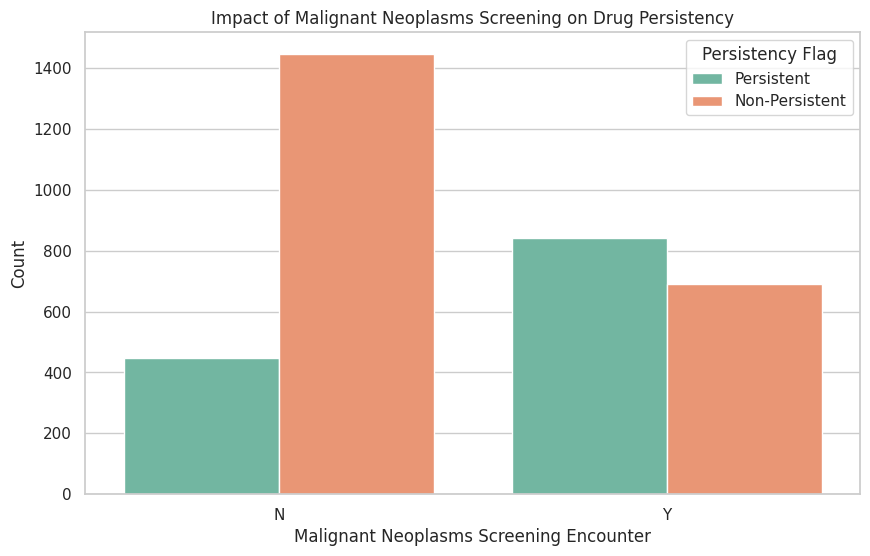

In [182]:
# Assuming 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms' as an example condition
plt.figure(figsize=(10, 6))
sns.countplot(x='Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', hue='Persistency_Flag', data=df, palette='Set2')
plt.title("Impact of Malignant Neoplasms Screening on Drug Persistency")
plt.xlabel("Malignant Neoplasms Screening Encounter")
plt.ylabel("Count")
plt.legend(title='Persistency Flag')
plt.show()


### J) Analysis of Glucocorticoid Usage During Therapy

**How does glucocorticoid usage during therapy vary among different age groups and its impact on drug persistency?**

<Figure size 1200x600 with 0 Axes>

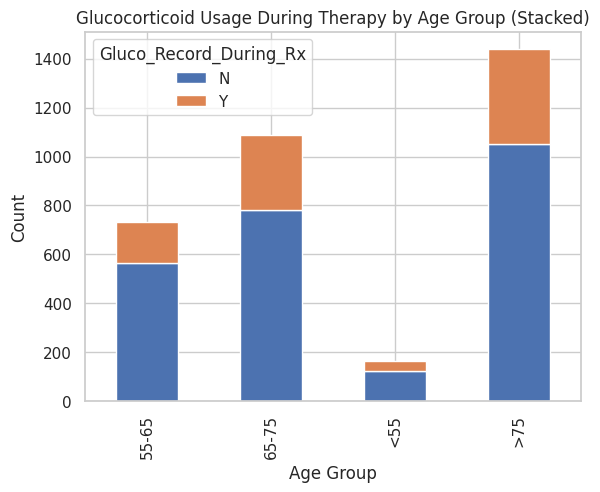

In [205]:
plt.figure(figsize=(12, 6))
df.groupby(['Age_Bucket', 'Gluco_Record_During_Rx']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Glucocorticoid Usage During Therapy by Age Group (Stacked)")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Gluco_Record_During_Rx')
plt.show()



### K) Analysis of Drug Persistency in Different NTM Risk Segments

**How does drug persistency vary among patients in different NTM (New to Market) risk segments?**

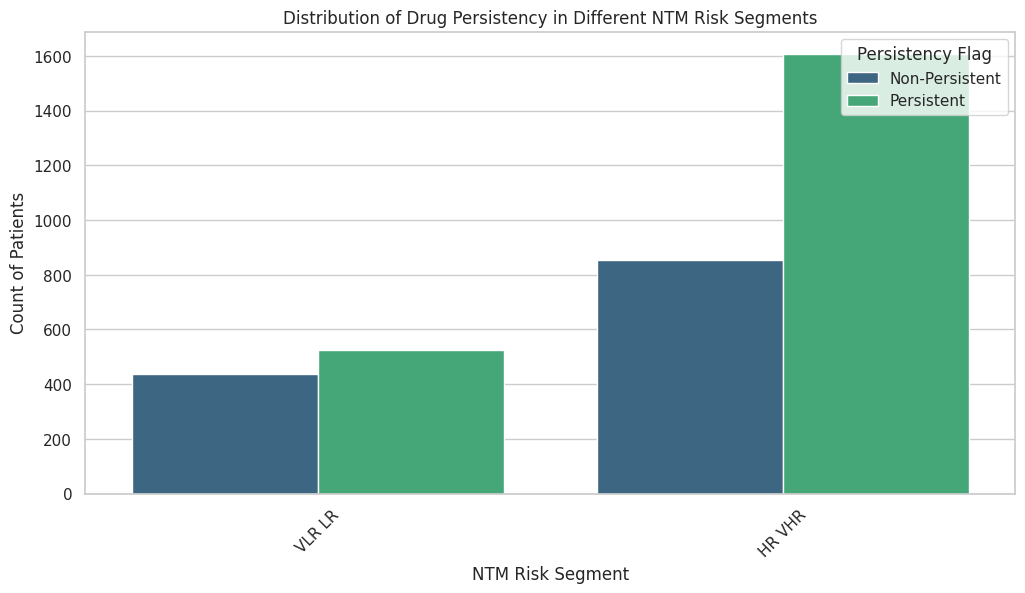

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Risk_Segment_During_Rx', hue='Persistency_Flag', data=df, palette='viridis')
plt.title("Distribution of Drug Persistency in Different NTM Risk Segments")
plt.xlabel("NTM Risk Segment")
plt.ylabel("Count of Patients")
plt.legend(title="Persistency Flag", loc='upper right', labels=["Non-Persistent", "Persistent"])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


